In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost

In [2]:
file_list = ["vascular_multimodal_dataset_{}.csv".format(i) for i in range(1, 9)]

In [3]:
file_list

['vascular_multimodal_dataset_1.csv',
 'vascular_multimodal_dataset_2.csv',
 'vascular_multimodal_dataset_3.csv',
 'vascular_multimodal_dataset_4.csv',
 'vascular_multimodal_dataset_5.csv',
 'vascular_multimodal_dataset_6.csv',
 'vascular_multimodal_dataset_7.csv',
 'vascular_multimodal_dataset_8.csv']

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

def get_independent_features(X, thresh=0.5):
    corr_df = X.corr()
    feature_sets = []
    
    for i, row in corr_df.iterrows():
        feature_set = []
        for item in row.iteritems():
            val = item[1]
            feature = item[0]
            if val < thresh and val > -thresh:
                feature_set.append(feature)
        
        feature_sets.append(feature_set)
    
    best_features = []
    best_avg = 1
    for i, fs in enumerate(feature_sets):
        feature_mean = np.mean(corr_df.iloc[i][fs])
        if feature_mean < best_avg:
            best_avg = feature_mean
            best_features = fs
    
    return X[best_features]
    


def buildModel(Y, MCI_df):
    X_train, X_test, y_train, y_test = train_test_split(MCI_df.index, Y, test_size=0.2)

    print("Number of train datapoints: {}".format(X_train.shape[0]))
    print("Number of test datapoints: {}".format(y_test.shape[0]))

    lm = LinearRegression()
    lm.fit(MCI_df.iloc[X_train], y_train)

    predictions_lm = lm.predict(MCI_df.iloc[X_test])
    
    mse = np.sqrt(np.mean((y_test - predictions_lm) ** 2))
    print ("The RMSE from Linear Model with one train/test split: {}".format(mse))

    mse_naive = np.sqrt(np.mean((np.mean(y_train) - y_test) ** 2))
    print ("The RMSE from Naive prediction: {}".format(mse_naive))
    
    #seeing if XGBoost can improve our performance
    xgb = xgboost.XGBRegressor()
    xgb.fit(MCI_df.iloc[X_train], y_train)
    
    predictions_xgb = xgb.predict(MCI_df.iloc[X_test])
    
    rmse_xgb = np.sqrt(np.mean((y_test - predictions_xgb) ** 2))
    print ("The RMSE from XGBoost with one train/test split: {}".format(rmse_xgb))
    
    if(rmse_xgb < mse):
        return xgb
    else:
        return lm

Analysing Dataset: vascular_multimodal_dataset_1.csv


,left_fimbria_volume_PR,left_subiculum_volume_PR,left_presubiculum_volume_PR,left_CA4_DG_volume_PR,left_hippocampal_fissure_volume_PR,left_CA2_3_volume_PR,right_fimbria_volume_PR,right_Hippo_Tail_volume_PR,right_subiculum_volume_PR,right_presubiculum_volume_PR,...,lh_pericalcarine_volume_PR,lh_postcentral_volume_PR,lh_precuneus_volume_PR,lh_rostralanteriorcingulate_volume_PR,1000*N_PO_PR_AFF_Total_Hippo,1000*N_PO_PR_UNAFF_Total_Hippo,PO_PR_UNAFF_MD_CH,PO_PR_ASL_Hippo_AFF,PO_PR_ASL_Hippo_UNAFF,PO_PR_RAVLT_1.5_SUM
0,-0.351689,-0.581194,-0.396623,-0.383575,-0.537543,-0.333366,-0.437072,-0.574581,-0.469564,-0.490694,...,-0.023083,-0.276762,-0.379170,0.073576,0.403805,0.016540,0.160407,-0.424007,-0.340940,0.053125
1,-0.067693,0.321844,-0.025825,0.616425,0.319563,0.658806,-0.017203,0.021518,0.530436,0.228118,...,0.544694,-0.024334,-0.012933,-0.269253,-0.046058,0.090565,-0.059367,-0.200189,-0.165879,0.053125
2,-0.046379,-0.299747,-0.426608,-0.232825,-0.076560,-0.234254,0.163893,-0.466165,-0.415721,-0.192669,...,0.293726,-0.434920,-0.302216,-0.247642,-0.221079,-0.490440,0.268817,0.575993,0.659060,-0.603125
3,0.648311,0.307935,0.489503,0.318076,0.129769,0.215517,0.227329,0.251266,0.477713,0.509306,...,0.074516,0.229659,0.620830,0.482220,-0.565802,-0.215864,-0.022130,-0.254739,-0.225325,0.396875
4,0.056678,0.418806,0.281634,0.162855,0.462457,0.157916,0.073350,0.151852,-0.053257,0.222992,...,-0.133850,-0.373536,-0.165633,-0.517780,-0.130664,-0.321433,0.381392,0.159354,0.140671,-0.165625
5,-0.026269,-0.204271,0.253862,-0.120745,-0.104070,-0.088431,-0.162201,0.300809,-0.051910,-0.192806,...,-0.187297,-0.178422,-0.139444,-0.317387,0.434198,0.509560,0.185125,-0.091071,-0.151961,0.271875
6,-0.105033,0.036877,0.075289,-0.219965,-0.084664,-0.209268,-0.123068,-0.002887,-0.194245,0.001083,...,-0.455306,0.435421,-0.246213,0.373183,-0.178607,-0.129259,-0.618608,0.007675,-0.047956,0.240625
7,0.193123,0.211294,0.095311,0.109653,0.026562,0.140592,0.324839,-0.078020,0.127986,-0.014019,...,0.165143,0.565080,0.495931,-0.030550,0.031265,0.219924,0.104829,0.052777,0.013886,0.084375
8,-0.093161,-0.274358,-0.510497,-0.363535,-0.372746,-0.341194,0.475067,-0.029211,-0.238976,-0.353824,...,-0.267080,0.146351,-0.139444,0.154126,0.196452,0.075597,-0.417519,0.116457,0.098340,-0.228125
9,-0.207887,0.062813,0.163954,0.113636,0.237233,0.033682,-0.524933,0.425419,0.287540,0.282512,...,-0.011464,-0.088537,0.268292,0.299509,0.076490,0.244809,0.017054,0.057748,0.020101,-0.103125


Number of train datapoints: 8
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.32967251981246815
The RMSE from Naive prediction: 0.4840125912376273
The RMSE from XGBoost with one train/test split: 0.34238979033441314
Analysing Dataset: vascular_multimodal_dataset_2.csv


,left_fimbria_volume_PR,left_subiculum_volume_PR,left_presubiculum_volume_PR,left_CA4_DG_volume_PR,left_hippocampal_fissure_volume_PR,left_CA2_3_volume_PR,right_fimbria_volume_PR,right_Hippo_Tail_volume_PR,right_subiculum_volume_PR,right_presubiculum_volume_PR,...,N_PO_PR_rh_lingual_volume,N_PO_PR_rh_medialorbitofrontal_volume,N_PO_PR_rh_middletemporal_volume,N_PO_PR_rh_parahippocampal_volume,N_PO_PR_rh_paracentral_volume,N_PO_PR_rh_parsopercularis_volume,PO_PR_UNAFF_MD_CH,PO_PR_ASL_Hippo_AFF,PO_PR_ASL_Hippo_UNAFF,PO_PR_RAVLT_1.5_SUM
0,-0.351689,-0.581194,-0.396623,-0.383575,-0.537543,-0.333366,-0.437072,-0.574581,-0.469564,-0.490694,...,0.418164,0.012374,0.277999,-0.278612,0.466084,-0.000429,0.160407,-0.424007,-0.340940,0.053125
1,-0.067693,0.321844,-0.025825,0.616425,0.319563,0.658806,-0.017203,0.021518,0.530436,0.228118,...,-0.226273,0.153268,-0.013376,-0.012704,0.094005,-0.140678,-0.059367,-0.200189,-0.165879,0.053125
2,-0.046379,-0.299747,-0.426608,-0.232825,-0.076560,-0.234254,0.163893,-0.466165,-0.415721,-0.192669,...,-0.295954,0.566160,0.113051,0.046253,-0.533916,-0.220747,0.268817,0.575993,0.659060,-0.603125
3,0.648311,0.307935,0.489503,0.318076,0.129769,0.215517,0.227329,0.251266,0.477713,0.509306,...,-0.057386,-0.346773,-0.436236,-0.364983,-0.151378,-0.036742,-0.022130,-0.254739,-0.225325,0.396875
4,0.056678,0.418806,0.281634,0.162855,0.462457,0.157916,0.073350,0.151852,-0.053257,0.222992,...,-0.581836,-0.044075,0.007868,-0.017200,0.097847,0.034973,0.381392,0.159354,0.140671,-0.165625
5,-0.026269,-0.204271,0.253862,-0.120745,-0.104070,-0.088431,-0.162201,0.300809,-0.051910,-0.192806,...,0.260119,0.083728,0.432891,0.255098,0.017774,0.067240,0.185125,-0.091071,-0.151961,0.271875
6,-0.105033,0.036877,0.075289,-0.219965,-0.084664,-0.209268,-0.123068,-0.002887,-0.194245,0.001083,...,0.045640,-0.186160,-0.188573,0.007856,-0.253720,-0.025194,-0.618608,0.007675,-0.047956,0.240625
7,0.193123,0.211294,0.095311,0.109653,0.026562,0.140592,0.324839,-0.078020,0.127986,-0.014019,...,0.356661,-0.111837,0.467170,0.635017,0.281001,0.195123,0.104829,0.052777,0.013886,0.084375
8,-0.093161,-0.274358,-0.510497,-0.363535,-0.372746,-0.341194,0.475067,-0.029211,-0.238976,-0.353824,...,-0.316450,-0.433840,-0.532830,-0.145855,0.262492,0.563227,-0.417519,0.116457,0.098340,-0.228125
9,-0.207887,0.062813,0.163954,0.113636,0.237233,0.033682,-0.524933,0.425419,0.287540,0.282512,...,0.397315,0.307155,-0.127964,-0.124871,-0.280188,-0.436773,0.017054,0.057748,0.020101,-0.103125


Number of train datapoints: 8
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.12751608652149332
The RMSE from Naive prediction: 0.2415882202510348
The RMSE from XGBoost with one train/test split: 0.1546602307581688
Analysing Dataset: vascular_multimodal_dataset_3.csv


,left_fimbria_volume_PR,left_subiculum_volume_PR,left_presubiculum_volume_PR,left_CA4_DG_volume_PR,left_hippocampal_fissure_volume_PR,left_CA2_3_volume_PR,right_fimbria_volume_PR,right_Hippo_Tail_volume_PR,right_subiculum_volume_PR,right_presubiculum_volume_PR,...,lh_pericalcarine_volume_PR,lh_postcentral_volume_PR,lh_precuneus_volume_PR,lh_rostralanteriorcingulate_volume_PR,1000*N_PO_PR_AFF_Total_Hippo,1000*N_PO_PR_UNAFF_Total_Hippo,PO_PR_UNAFF_MD_CH,PO_PR_ASL_Hippo_AFF,PO_PR_ASL_Hippo_UNAFF,PO_PR_RAVLT_1.5_SUM
0,-0.351689,-0.581194,-0.396623,-0.383575,-0.537543,-0.333366,-0.437072,-0.574581,-0.469564,-0.490694,...,-0.023083,-0.276762,-0.379170,0.073576,0.403805,0.016540,0.160407,-0.424007,-0.340940,0.053125
1,-0.067693,0.321844,-0.025825,0.616425,0.319563,0.658806,-0.017203,0.021518,0.530436,0.228118,...,0.544694,-0.024334,-0.012933,-0.269253,-0.046058,0.090565,-0.059367,-0.200189,-0.165879,0.053125
2,-0.046379,-0.299747,-0.426608,-0.232825,-0.076560,-0.234254,0.163893,-0.466165,-0.415721,-0.192669,...,0.293726,-0.434920,-0.302216,-0.247642,-0.221079,-0.490440,0.268817,0.575993,0.659060,-0.603125
3,0.648311,0.307935,0.489503,0.318076,0.129769,0.215517,0.227329,0.251266,0.477713,0.509306,...,0.074516,0.229659,0.620830,0.482220,-0.565802,-0.215864,-0.022130,-0.254739,-0.225325,0.396875
4,0.056678,0.418806,0.281634,0.162855,0.462457,0.157916,0.073350,0.151852,-0.053257,0.222992,...,-0.133850,-0.373536,-0.165633,-0.517780,-0.130664,-0.321433,0.381392,0.159354,0.140671,-0.165625
5,-0.026269,-0.204271,0.253862,-0.120745,-0.104070,-0.088431,-0.162201,0.300809,-0.051910,-0.192806,...,-0.187297,-0.178422,-0.139444,-0.317387,0.434198,0.509560,0.185125,-0.091071,-0.151961,0.271875
6,-0.105033,0.036877,0.075289,-0.219965,-0.084664,-0.209268,-0.123068,-0.002887,-0.194245,0.001083,...,-0.455306,0.435421,-0.246213,0.373183,-0.178607,-0.129259,-0.618608,0.007675,-0.047956,0.240625
7,0.193123,0.211294,0.095311,0.109653,0.026562,0.140592,0.324839,-0.078020,0.127986,-0.014019,...,0.165143,0.565080,0.495931,-0.030550,0.031265,0.219924,0.104829,0.052777,0.013886,0.084375
8,-0.093161,-0.274358,-0.510497,-0.363535,-0.372746,-0.341194,0.475067,-0.029211,-0.238976,-0.353824,...,-0.267080,0.146351,-0.139444,0.154126,0.196452,0.075597,-0.417519,0.116457,0.098340,-0.228125
9,-0.207887,0.062813,0.163954,0.113636,0.237233,0.033682,-0.524933,0.425419,0.287540,0.282512,...,-0.011464,-0.088537,0.268292,0.299509,0.076490,0.244809,0.017054,0.057748,0.020101,-0.103125


Number of train datapoints: 8
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.21329673007748173
The RMSE from Naive prediction: 0.21763106683100186
The RMSE from XGBoost with one train/test split: 0.4007199517826292
Analysing Dataset: vascular_multimodal_dataset_4.csv


,left_fimbria_volume_PR,left_subiculum_volume_PR,left_presubiculum_volume_PR,left_CA4_DG_volume_PR,left_hippocampal_fissure_volume_PR,left_CA2_3_volume_PR,right_fimbria_volume_PR,right_Hippo_Tail_volume_PR,right_subiculum_volume_PR,right_presubiculum_volume_PR,...,N_PO_PR_rh_lingual_volume,N_PO_PR_rh_medialorbitofrontal_volume,N_PO_PR_rh_middletemporal_volume,N_PO_PR_rh_parahippocampal_volume,N_PO_PR_rh_paracentral_volume,N_PO_PR_rh_parsopercularis_volume,PO_PR_UNAFF_MD_CH,PO_PR_ASL_Hippo_AFF,PO_PR_ASL_Hippo_UNAFF,PO_PR_RAVLT_1.5_SUM
0,-0.351689,-0.581194,-0.396623,-0.383575,-0.537543,-0.333366,-0.437072,-0.574581,-0.469564,-0.490694,...,0.418164,0.012374,0.277999,-0.278612,0.466084,-0.000429,0.160407,-0.424007,-0.340940,0.053125
1,-0.067693,0.321844,-0.025825,0.616425,0.319563,0.658806,-0.017203,0.021518,0.530436,0.228118,...,-0.226273,0.153268,-0.013376,-0.012704,0.094005,-0.140678,-0.059367,-0.200189,-0.165879,0.053125
2,-0.046379,-0.299747,-0.426608,-0.232825,-0.076560,-0.234254,0.163893,-0.466165,-0.415721,-0.192669,...,-0.295954,0.566160,0.113051,0.046253,-0.533916,-0.220747,0.268817,0.575993,0.659060,-0.603125
3,0.648311,0.307935,0.489503,0.318076,0.129769,0.215517,0.227329,0.251266,0.477713,0.509306,...,-0.057386,-0.346773,-0.436236,-0.364983,-0.151378,-0.036742,-0.022130,-0.254739,-0.225325,0.396875
4,0.056678,0.418806,0.281634,0.162855,0.462457,0.157916,0.073350,0.151852,-0.053257,0.222992,...,-0.581836,-0.044075,0.007868,-0.017200,0.097847,0.034973,0.381392,0.159354,0.140671,-0.165625
5,-0.026269,-0.204271,0.253862,-0.120745,-0.104070,-0.088431,-0.162201,0.300809,-0.051910,-0.192806,...,0.260119,0.083728,0.432891,0.255098,0.017774,0.067240,0.185125,-0.091071,-0.151961,0.271875
6,-0.105033,0.036877,0.075289,-0.219965,-0.084664,-0.209268,-0.123068,-0.002887,-0.194245,0.001083,...,0.045640,-0.186160,-0.188573,0.007856,-0.253720,-0.025194,-0.618608,0.007675,-0.047956,0.240625
7,0.193123,0.211294,0.095311,0.109653,0.026562,0.140592,0.324839,-0.078020,0.127986,-0.014019,...,0.356661,-0.111837,0.467170,0.635017,0.281001,0.195123,0.104829,0.052777,0.013886,0.084375
8,-0.093161,-0.274358,-0.510497,-0.363535,-0.372746,-0.341194,0.475067,-0.029211,-0.238976,-0.353824,...,-0.316450,-0.433840,-0.532830,-0.145855,0.262492,0.563227,-0.417519,0.116457,0.098340,-0.228125
9,-0.207887,0.062813,0.163954,0.113636,0.237233,0.033682,-0.524933,0.425419,0.287540,0.282512,...,0.397315,0.307155,-0.127964,-0.124871,-0.280188,-0.436773,0.017054,0.057748,0.020101,-0.103125


Number of train datapoints: 8
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.12190060203343633
The RMSE from Naive prediction: 0.06640625000000003
The RMSE from XGBoost with one train/test split: 0.3921058272087494
Analysing Dataset: vascular_multimodal_dataset_5.csv


,left_fimbria_volume_PR,left_Hippo_Tail_volume_PR,left_subiculum_volume_PR,left_presubiculum_volume_PR,left_CA4_DG_volume_PR,left_CA1_volume_PR,left_hippocampal_fissure_volume_PR,left_CA2_3_volume_PR,right_fimbria_volume_PR,right_Hippo_Tail_volume_PR,...,lh_paracentral_volume_PR,lh_parstriangularis_volume_PR,lh_postcentral_volume_PR,lh_precuneus_volume_PR,lh_rostralanteriorcingulate_volume_PR,6MO_PO_AFF_MD_CH,6MO_PO_UNAFF_MD_CH,6MO_PO_ASL_Hippo_AFF,6MO_PO_ASL_Hippo_UNAFF,PO_PR_RAVLT_1.5_SUM
0,-0.368294,-0.379218,-0.575762,-0.411655,-0.417438,-0.410046,-0.535573,-0.354653,-0.444450,-0.490722,...,-0.433870,0.192391,-0.583553,-0.435267,-0.422676,0.321866,-0.076867,-0.480856,-0.593809,-0.025
1,0.631706,-0.491373,0.312112,0.474472,0.346190,-0.046228,0.325724,0.249712,0.219951,0.054901,...,0.134105,0.388324,0.127529,0.564733,0.577324,0.062967,0.518795,-0.227044,-0.193957,0.525
2,0.192481,0.508627,0.424238,0.253531,0.582562,0.504796,0.019335,0.636727,0.419567,0.509278,...,-0.056227,0.165588,0.348285,0.156191,-0.369792,-0.328291,-0.013251,0.034526,-0.021604,-0.025
3,-0.121637,0.059287,0.041436,0.060258,-0.239377,0.116663,0.048957,-0.218011,-0.130446,-0.113013,...,-0.137798,-0.611676,0.416447,-0.302310,0.310497,0.002090,-0.053858,0.053534,0.113075,0.275
4,-0.109765,-0.082022,-0.269359,-0.525528,-0.395629,-0.495204,-0.322870,-0.363273,0.467689,-0.130405,...,-0.072340,-0.310382,0.010554,-0.195541,-0.225561,-0.529316,0.106386,0.100695,0.290102,-0.475
5,-0.224491,0.384700,0.067335,0.148923,0.123692,0.330020,0.464427,0.049497,-0.532311,0.169961,...,0.566130,0.175755,-0.319261,0.212194,0.130208,0.470684,-0.481205,0.519144,0.406191,-0.275


Number of train datapoints: 4
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.4392580406578475
The RMSE from Naive prediction: 0.44176492617680735
The RMSE from XGBoost with one train/test split: 0.4269160582216466
Analysing Dataset: vascular_multimodal_dataset_6.csv


,left_Hippo_Tail_volume_PR,lh_bankssts_volume_PR,lh_caudalanteriorcingulate_volume_PR,lh_caudalmiddlefrontal_volume_PR,lh_cuneus_volume_PR,lh_fusiform_volume_PR,lh_inferiorparietal_volume_PR,lh_lateralorbitofrontal_volume_PR,lh_lingual_volume_PR,lh_middletemporal_volume_PR,...,N_PO_PR_lh_BA1_volume,N_PO_PR_lh_MT_volume,N_PO_PR_rh_BA1_volume,N_PO_PR_rh_BA3b_volume,N_PO_PR_rh_BA4a_volume,N_PO_PR_rh_BA4p_volume,6MO_PO_UNAFF_FA_CH,6MO_PO_UNAFF_MD_CH,6MO_PO_ASL_Hippo_AFF,PO_PR_RAVLT_1.5_SUM
0,-0.379218,-0.159594,-0.317130,0.058959,0.074378,-0.219302,-0.091226,-0.329584,-0.221958,-0.122233,...,0.057161,0.170861,0.116935,0.257414,0.330103,0.150859,-0.159362,-0.076867,-0.480856,-0.025
1,-0.491373,-0.118081,-0.355591,-0.303760,-0.129630,0.658200,0.466288,0.039877,-0.052214,0.560291,...,0.472651,0.314996,0.541768,0.504045,-0.158713,-0.642909,-0.628950,0.518795,-0.227044,0.525
2,0.508627,0.616236,0.187144,0.413460,0.513358,0.050986,0.040833,0.594751,0.026405,-0.215725,...,-0.527349,-0.438799,-0.035135,-0.474237,-0.208547,-0.146745,0.082190,-0.013251,0.034526,-0.025
3,0.059287,-0.383764,0.433939,-0.586540,-0.293564,-0.232278,-0.533712,-0.405249,-0.562041,-0.439709,...,-0.309690,-0.064974,-0.458232,0.321739,0.060720,0.299893,0.001664,-0.053858,0.053534,0.275
4,-0.082022,-0.011993,-0.474181,0.017868,0.322101,-0.341800,-0.046260,-0.367757,0.371848,-0.276511,...,0.278043,0.508958,-0.352272,-0.113007,0.488218,0.357091,0.371050,0.106386,0.100695,-0.475
5,0.384700,0.057196,0.525819,0.400012,-0.486642,0.084195,0.164077,0.467962,0.437959,0.493888,...,0.029184,-0.491042,0.186936,-0.495955,-0.511782,-0.018188,0.333408,-0.481205,0.519144,-0.275


Number of train datapoints: 4
Number of test datapoints: 2
The RMSE from Linear Model with one train/test split: 0.26171902070616854
The RMSE from Naive prediction: 0.25739075352467505
The RMSE from XGBoost with one train/test split: 0.4272204758667346
Analysing Dataset: vascular_multimodal_dataset_7.csv


,left_fimbria_volume_PR,left_Hippo_Tail_volume_PR,left_subiculum_volume_PR,left_presubiculum_volume_PR,left_CA4_DG_volume_PR,left_CA1_volume_PR,left_hippocampal_fissure_volume_PR,left_CA2_3_volume_PR,right_fimbria_volume_PR,right_Hippo_Tail_volume_PR,...,lh_paracentral_volume_PR,lh_parstriangularis_volume_PR,lh_postcentral_volume_PR,lh_precuneus_volume_PR,lh_rostralanteriorcingulate_volume_PR,6MO_PO_AFF_MD_CH,6MO_PO_UNAFF_MD_CH,6MO_PO_ASL_Hippo_AFF,6MO_PO_ASL_Hippo_UNAFF,PO_PR_RAVLT_1.5_SUM
0,-0.368294,-0.379218,-0.575762,-0.411655,-0.417438,-0.410046,-0.535573,-0.354653,-0.444450,-0.490722,...,-0.433870,0.192391,-0.583553,-0.435267,-0.422676,0.321866,-0.076867,-0.480856,-0.593809,-0.025
1,0.631706,-0.491373,0.312112,0.474472,0.346190,-0.046228,0.325724,0.249712,0.219951,0.054901,...,0.134105,0.388324,0.127529,0.564733,0.577324,0.062967,0.518795,-0.227044,-0.193957,0.525
2,0.192481,0.508627,0.424238,0.253531,0.582562,0.504796,0.019335,0.636727,0.419567,0.509278,...,-0.056227,0.165588,0.348285,0.156191,-0.369792,-0.328291,-0.013251,0.034526,-0.021604,-0.025
3,-0.121637,0.059287,0.041436,0.060258,-0.239377,0.116663,0.048957,-0.218011,-0.130446,-0.113013,...,-0.137798,-0.611676,0.416447,-0.302310,0.310497,0.002090,-0.053858,0.053534,0.113075,0.275
4,-0.109765,-0.082022,-0.269359,-0.525528,-0.395629,-0.495204,-0.322870,-0.363273,0.467689,-0.130405,...,-0.072340,-0.310382,0.010554,-0.195541,-0.225561,-0.529316,0.106386,0.100695,0.290102,-0.475
5,-0.224491,0.384700,0.067335,0.148923,0.123692,0.330020,0.464427,0.049497,-0.532311,0.169961,...,0.566130,0.175755,-0.319261,0.212194,0.130208,0.470684,-0.481205,0.519144,0.406191,-0.275


e:\programs\python36\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

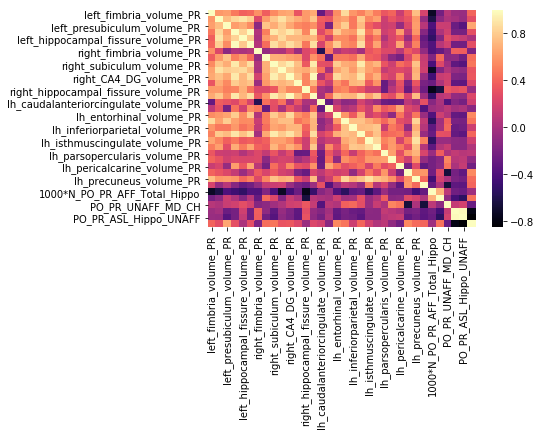

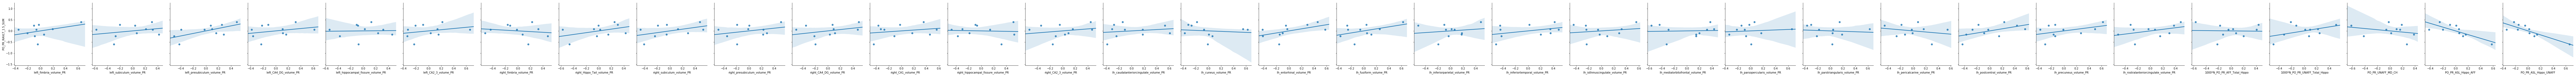

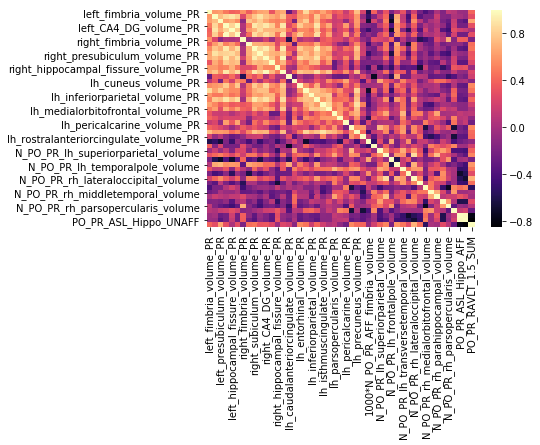

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display

pd.options.mode.chained_assignment = None

def doAnalysis(file):
    print("Analysing Dataset: {}".format(file))
    df = pd.read_csv(file)
    
#     plt.figure()
#     sns.heatmap(df.corr(), cmap='coolwarm')
    
    Y = df['PO_PR_RAVLT_1.5_SUM']
    df.drop(['PID', 'PO_PR_RAVLT_1.5_SUM'], axis=1, inplace=True)
    MCI_df = get_independent_features(df)
    MCI_df['PO_PR_RAVLT_1.5_SUM'] = Y
    
    display(MCI_df)
    
    plt.figure()
    sns.heatmap(MCI_df.corr(), cmap='magma')
    
    #plotting the correlation of the feature variables with the target variable
    plt.figure()
    sns.pairplot(MCI_df, x_vars=MCI_df.columns[:-1], y_vars = ['PO_PR_RAVLT_1.5_SUM'], kind="reg", height=4)
    
    MCI_df.drop('PO_PR_RAVLT_1.5_SUM', axis=1)
    model = buildModel(Y, MCI_df)
    
    return model
    
    

models = []
for file in file_list:
    models.append(doAnalysis(file))

In [6]:
sets = [set(pd.read_csv(file_list[i])) for i in range(8)]
result = sets[0]
for s in sets:
    result = result.intersection(s)
intersect_cols = list(result)

dfs = [pd.read_csv(file_list[i]) for i in range(8)]
MCI_df = pd.concat(dfs, ignore_index=True)
print(MCI_df.shape)


MCI_df = MCI_df[intersect_cols]

(64, 95)


e:\programs\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Training Linear Model
Number of train datapoints: 51
Number of test datapoints: 13
The RMSE from Linear Model with one train/test split: 1.633245080094992e-14
The RMSE from Naive prediction: 0.21638491371545943
The RMSE from Linear Model fold #1: 9.867765489783374e-16
The RMSE from Linear Model fold #2: 6.220839172053827e-15
The RMSE from Linear Model fold #3: 5.7228510281774e-15
The RMSE from Linear Model fold #4: 6.6002011869705746e-15
The RMSE from Linear Model fold #5: 5.475174602784725e-15
The MSE from XGB Model fold #1: 0.00048477542328298083
The MSE from XGB Model fold #2: 0.00020100095118610203
The MSE from XGB Model fold #3: 0.00020698266902100212
The MSE from XGB Model fold #4: 0.00029964229024722586
The MSE from XGB Model fold #5: 0.0003234880459053999


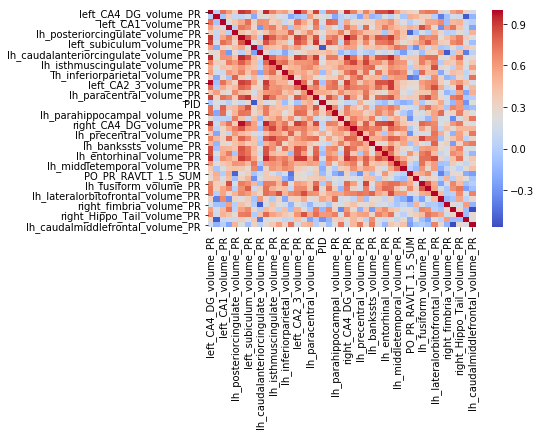

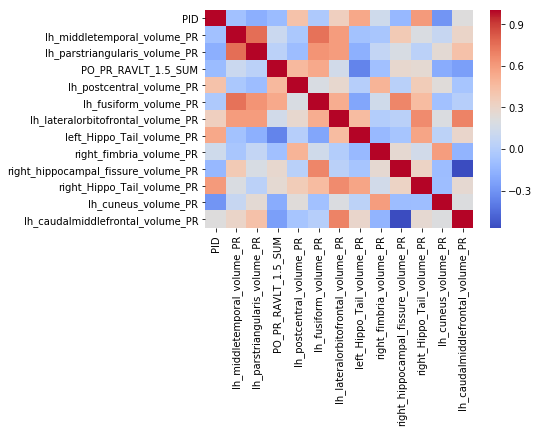

In [7]:
plt.figure()
sns.heatmap(MCI_df.corr(), cmap='coolwarm')

Y = MCI_df['PO_PR_RAVLT_1.5_SUM']
MCI_df = calculate_vif_(MCI_df)

plt.figure()
sns.heatmap(MCI_df.corr(), cmap='coolwarm')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

print("Training Linear Model")
X_train, X_test, y_train, y_test = train_test_split(MCI_df.index, Y, test_size=0.2)

print("Number of train datapoints: {}".format(X_train.shape[0]))
print("Number of test datapoints: {}".format(y_test.shape[0]))

lm = LinearRegression()
lm.fit(MCI_df.iloc[X_train], y_train)

predictions = lm.predict(MCI_df.iloc[X_test])

rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
print ("The RMSE from Linear Model with one train/test split: {}".format(rmse))

rmse_naive = np.sqrt(np.mean((np.mean(y_train) - y_test) ** 2))
print ("The RMSE from Naive prediction: {}".format(rmse_naive))

kf = KFold(n_splits=5)
kf.get_n_splits(MCI_df)

c=1
for train_index, test_index in kf.split(MCI_df):
    X_train, X_test = MCI_df.iloc[train_index], MCI_df.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)

    rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
    print ("The RMSE from Linear Model fold #{}: {}".format(c,rmse))
    c= c+1
    


import xgboost

xgb = xgboost.XGBRegressor()

c=1
for train_index, test_index in kf.split(MCI_df):
    X_train, X_test = MCI_df.iloc[train_index], MCI_df.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    xgb.fit(X_train, y_train)
    predictions = xgb.predict(X_test)

    rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
    print ("The MSE from XGB Model fold #{}: {}".format(c,rmse))
    c= c+1